# Modeling NBA Basketball Scores

In [1]:
# Install nba_api package if missing
import importlib.util
if importlib.util.find_spec("nba_api") is None:
    !pip install nba_api    

In [2]:
from nba_api.stats.endpoints import playbyplayv2, leaguegamefinder
import pandas as pd
import matplotlib.pyplot as plt

# Golden State Warriors' team ID (you can find team IDs in the NBA API documentation)
GSW_TEAM_ID = 1610612744
SEASON = '2022-23'

# Step 1: Function to get the game ID for GSW in the 2022-23 season
def get_game_id(team_id, season):
    gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=team_id, season_nullable=season)
    games = gamefinder.get_data_frames()[0]
    return games[['GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL']]

# Step 2: Convert time string (MM:SS) to cumulative time in seconds, considering quarters
def convert_time(period, time_str):
    minutes, seconds = map(int, time_str.split(':'))
    # Each period is 12 minutes, so we calculate cumulative seconds
    return (period - 1) * 12 * 60 + (12 * 60 - (minutes * 60 + seconds))

# Step 3: Function to get score progression from the play-by-play data
def get_game_score_progress(game_id):
    pbp = playbyplayv2.PlayByPlayV2(game_id=game_id)
    plays = pbp.get_data_frames()[0]  # Get play-by-play dataframe

    # Filter the dataframe to focus on scores
    score_updates = plays[['PERIOD', 'PCTIMESTRING', 'SCORE', 'HOMEDESCRIPTION', 'VISITORDESCRIPTION']]
    score_updates = score_updates.dropna(subset=['SCORE'])  # Keep only rows where score is updated

    # Convert PCTIMESTRING to cumulative game time in seconds
    score_updates['CUMULATIVE_TIME'] = score_updates.apply(lambda row: convert_time(row['PERIOD'], row['PCTIMESTRING']), axis=1)

    return score_updates

# Step 4: Function to plot the score progression over time
def plot_score_progress(score_progress):
    score_progress = score_progress.dropna(subset=['SCORE'])

    # Extract the cumulative time and score from the play-by-play data
    cumulative_time = score_progress['CUMULATIVE_TIME']
    score = score_progress['SCORE'].str.split('-').apply(lambda x: [int(i) for i in x])

    home_scores = score.apply(lambda x: x[0])
    visitor_scores = score.apply(lambda x: x[1])

    # Plot the score progression
    plt.plot(cumulative_time, home_scores, label="Home Team", color='blue')
    plt.plot(cumulative_time, visitor_scores, label="Visitor Team", color='red')
    plt.xlabel('Cumulative Time (Seconds)')
    plt.ylabel('Score')
    plt.title('Score Progression Throughout the Game')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Step 5: Main function to retrieve and display game score progression
def main():
    # Get all games for Golden State Warriors in the 2022-23 season
    games = get_game_id(GSW_TEAM_ID, SEASON)

    # Select a game ID (for simplicity, I will hardcode an example)
    # In real usage, you could select one based on the games list.
    game_id = games.iloc[0]['GAME_ID']  # Taking the first game from the DataFrame as an example

    # Get and display the score progression for the selected game
    score_progress = get_game_score_progress(game_id)

    # Plot the score progression
    plot_score_progress(score_progress)


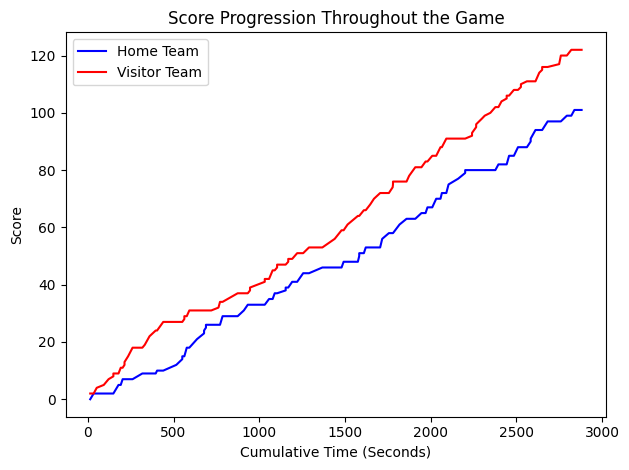

In [3]:
main()

In [4]:

import numpy as np
games = get_game_id(GSW_TEAM_ID, SEASON)
game_id = games.iloc[0]['GAME_ID']  # Taking the first game from the DataFrame as an example

    # Get and display the score progression for the selected game
score_progress = get_game_score_progress(game_id)

score_progress = score_progress.dropna(subset=['SCORE'])

# Extract the cumulative time and score from the play-by-play data
cumulative_time = score_progress['CUMULATIVE_TIME']
score = score_progress['SCORE'].str.split('-').apply(lambda x: [int(i) for i in x])

home_scores = score.apply(lambda x: x[0])
visitor_scores = score.apply(lambda x: x[1])
# Linear regression for home scores
slope_home, intercept_home = np.polyfit(cumulative_time, home_scores, 1)
predicted_home_scores = slope_home * cumulative_time + intercept_home
residuals_home = home_scores - predicted_home_scores

# Linear regression for away scores
slope_away, intercept_away = np.polyfit(cumulative_time, visitor_scores, 1)
predicted_away_scores = slope_away * cumulative_time + intercept_away
residuals_away = visitor_scores - predicted_away_scores



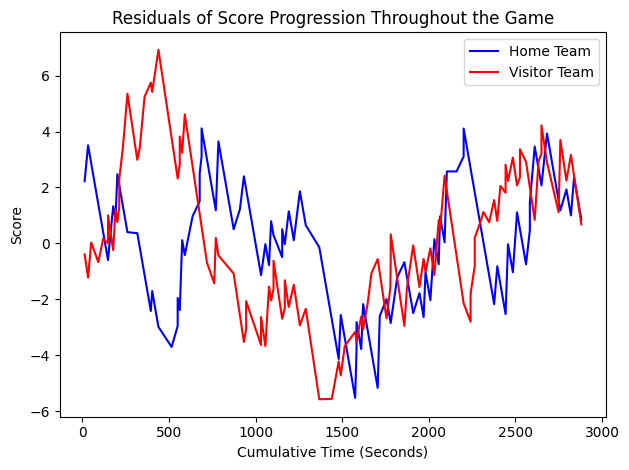

In [5]:
plt.plot(cumulative_time, residuals_home, label="Home Team", color='blue')
plt.plot(cumulative_time, residuals_away, label="Visitor Team", color='red')
plt.xlabel('Cumulative Time (Seconds)')
plt.ylabel('Score')
plt.title('Residuals of Score Progression Throughout the Game')
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
nba_team_ids = {
    "ATL": {"team_id": 1610612737, "team_name": "Atlanta Hawks"},
    "BOS": {"team_id": 1610612738, "team_name": "Boston Celtics"},
    "BKN": {"team_id": 1610612751, "team_name": "Brooklyn Nets"},
    "CHA": {"team_id": 1610612766, "team_name": "Charlotte Hornets"},
    "CHI": {"team_id": 1610612741, "team_name": "Chicago Bulls"},
    "CLE": {"team_id": 1610612739, "team_name": "Cleveland Cavaliers"},
    "DAL": {"team_id": 1610612742, "team_name": "Dallas Mavericks"},
    "DEN": {"team_id": 1610612743, "team_name": "Denver Nuggets"},
    "DET": {"team_id": 1610612765, "team_name": "Detroit Pistons"},
    "GSW": {"team_id": 1610612744, "team_name": "Golden State Warriors"},
    "HOU": {"team_id": 1610612745, "team_name": "Houston Rockets"},
    "IND": {"team_id": 1610612754, "team_name": "Indiana Pacers"},
    "LAC": {"team_id": 1610612746, "team_name": "Los Angeles Clippers"},
    "LAL": {"team_id": 1610612747, "team_name": "Los Angeles Lakers"},
    "MEM": {"team_id": 1610612763, "team_name": "Memphis Grizzlies"},
    "MIA": {"team_id": 1610612748, "team_name": "Miami Heat"},
    "MIL": {"team_id": 1610612749, "team_name": "Milwaukee Bucks"},
    "MIN": {"team_id": 1610612750, "team_name": "Minnesota Timberwolves"},
    "NOP": {"team_id": 1610612740, "team_name": "New Orleans Pelicans"},
    "NYK": {"team_id": 1610612752, "team_name": "New York Knicks"},
    "OKC": {"team_id": 1610612760, "team_name": "Oklahoma City Thunder"},
    "ORL": {"team_id": 1610612753, "team_name": "Orlando Magic"},
    "PHI": {"team_id": 1610612755, "team_name": "Philadelphia 76ers"},
    "PHX": {"team_id": 1610612756, "team_name": "Phoenix Suns"},
    "POR": {"team_id": 1610612757, "team_name": "Portland Trail Blazers"},
    "SAC": {"team_id": 1610612758, "team_name": "Sacramento Kings"},
    "SAS": {"team_id": 1610612759, "team_name": "San Antonio Spurs"},
    "TOR": {"team_id": 1610612761, "team_name": "Toronto Raptors"},
    "UTA": {"team_id": 1610612762, "team_name": "Utah Jazz"},
    "WAS": {"team_id": 1610612764, "team_name": "Washington Wizards"},
}


# Geometric Brownian Motion


Geometric Brownian Motion (GBM) is a continuous-time stochastic process that is commonly used in financial mathematics to model the dynamics of various assets, including stock prices. It is defined by the stochastic differential equation (SDE):

$$ dS_t = \mu S_t dt + \sigma S_t dW_t $$

In this equation, $ S_t $ represents the asset price at time $ t $, $ \mu $ is the drift coefficient (representing the expected return of the asset), $ \sigma $ is the volatility coefficient (representing the risk or uncertainty), and $ dW_t $ is an increment of a Wiener process or standard Brownian motion. $ dW_t $ can be thought of as $ \sqrt{dt} \times \text{Normal}(0,1) $, where Normal(0,1) is a standard normal distribution. This model assumes that the percentage change in the asset price is normally distributed with mean $ \mu dt $ and variance $ \sigma^2 dt $.

One of the key properties of GBM is that it produces log-normally distributed asset prices over time. This is because the logarithm of asset prices follows a Brownian motion with drift. The solution to the GBM SDE can be expressed as:

$$ S_t = S_0 \exp \left( \left( \mu - \frac{1}{2} \sigma^2 \right) t + \sigma W_t \right) $$

Where $ S_0 $ is the initial asset price at $ t=0 $. This formula shows that the asset price at any future time $ t $ depends on the initial price $ S_0 $, the drift and volatility coefficients, and the path taken by the Wiener process up to time $ t $.


In [7]:
T = 500 # total time
dt = .01 # time step

mu = 0.01 # drift
sigma = 1. # volatility (diffusion)

# Initial stock price
S = 1

# Generate time steps
times = np.arange(0, T, dt)

# Simulate stock price
S_log = [np.log(S)]  # Initial log price

for i in range(1, len(times)):

    dW = np.sqrt(dt)*np.random.normal(0, 1)  # Brownian motion

    # Change in log price (follows standard Brownian motion)
    d_logS = mu*dt + sigma*dW

    S_log += [S_log[i - 1] + d_logS]


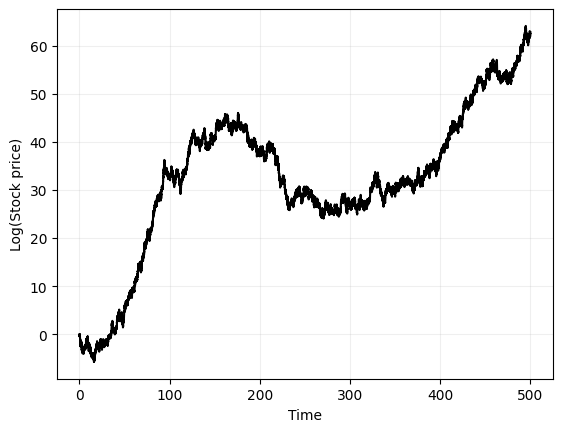

In [8]:
plt.plot(times, S_log, 'k')


plt.xlabel('Time')
plt.ylabel('Log(Stock price)')

plt.grid(alpha=.2)

# Solving the Diffusion Equation

This presents an algorithm for directly solving a diffusion equation.

 * The first algorithm solves for the distribution of walkers as we did in class:

$$
\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2}
$$

where $u(x,t)$ is the density of walkers at position $x$ and time $t$, and $D$ is the diffusion constant.

 * The second solves a boundary value problem, analogous to  the [Cook my meat](http://up.csail.mit.edu/science-of-cooking/) app that we discussed in class.



In [9]:
import numpy as np

from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 15})

import scipy
import scipy.integrate


In [10]:
class DiffusionPDE:

    def __init__(self, L=20, dx=.1, u_left=0, u_right=0):

        self.L = L # total length of the space
        self.dx = dx # space step

        # total number of space points
        self.n_space_dx = int(L/dx)

        c=1/self.dx**2 #spatial scale

        # Define the discretization of the second derivative
        self.kernel = np.array([1.,-2.,1.]) * c

        # Boundary conditions
        # we assume that the total space is much larger than the scale
        self.u_left = u_left # left boundary value
        self.u_right = u_right # right boundary value


    def deriv(self, u, t):
        """Returns the time derivative of our PDE

        Args:
            u: A numpy array containing the current densities
            t: The current time

        Returns:
            A numpy array containing the derivatives
        """

        # Add boundary values at the ends
        u_padded = np.concatenate([[self.u_left],u,[self.u_right]])

        # Compute the right-hand side
        # look up what np.correlate does!!
        rhs = np.correlate(u_padded, self.kernel, mode='valid')

        return rhs


    def solve(self, tmax=10, dt=.1, u0=None):

        # discretize space
        width = self.L/2
        x = np.linspace(-width, width, self.n_space_dx)

        # if no initial condition is given, use a Gaussian
        if u0 is None:
            u0 = np.exp(-x**2)
        else:
            # check u0 is the right size
            assert len(u0) == len(x)

            #check that there are no NaNs or negative values
            assert not np.isnan(u0).any()
            assert not (u0 < 0).any()


        # discretize time
        t = np.arange(0, tmax, dt)

        # solve the PDE
        u = scipy.integrate.odeint(self.deriv, u0, t)

        return t, x, u

## Basic solution from initial profile

In [11]:
sys = DiffusionPDE(L=20, dx=.1)


tmax = 10

t, x, ut = sys.solve(tmax=tmax, dt=.1)


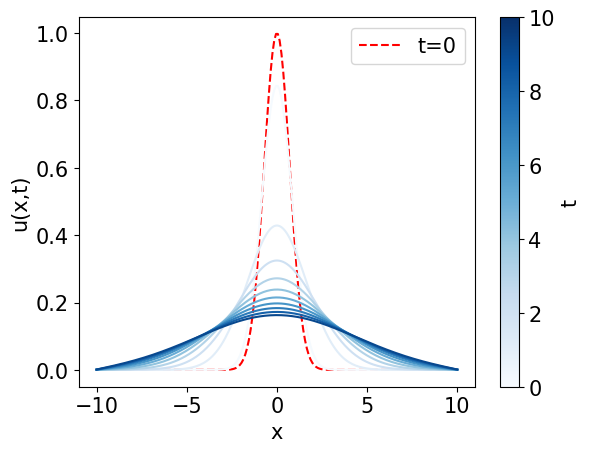

In [12]:
fig, ax = plt.subplots()

#plot initial condition in red
ax.plot(x,ut[0,:],'r--', label='t=0')

#plot the solution every 10 time steps
cmap = plt.get_cmap('Blues')
for i in range(1,ut.shape[0],10):
    ax.plot(x,ut[i,:],color=cmap(i/ut.shape[0]))

plt.xlabel('x')
plt.ylabel('u(x,t)')

#colormap
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=tmax))
sm.set_array([])
plt.colorbar(sm, label='t', ax=ax)

ax.legend()
plt.show()

## Diffusion constant

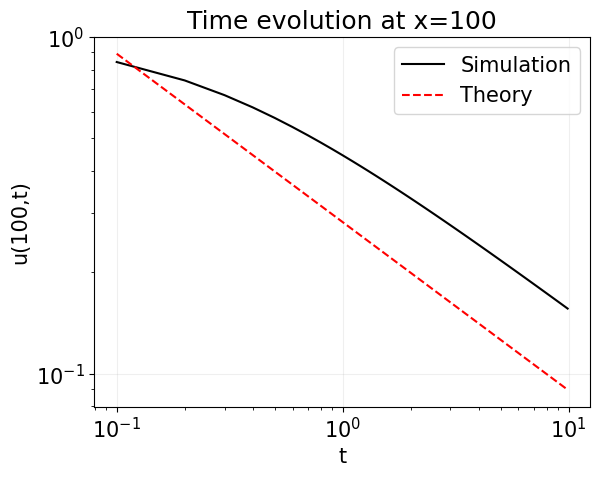

In [13]:
#plot time change at fixed x

x_plot = 100

plt.plot(t[1:], ut[1:,x_plot], 'k', label='Simulation')

plt.plot(t[1:],1/(np.sqrt(t[1:])*np.sqrt(4*np.pi)), 'r--', label='Theory')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('t')
plt.ylabel(f'u({x_plot},t)')
plt.title(f'Time evolution at x={x_plot}')

plt.legend()

plt.grid(alpha=.2)

plt.show()


## Boundary value problems - Cooking

In [14]:
L = 40
dx = .1

tmax = 200

sys = DiffusionPDE(L=L, dx=dx, u_left=23, u_right=150)


u0=np.ones(int(L/dx))*23

t,x,ut=sys.solve(tmax=tmax, dt=1., u0=u0)


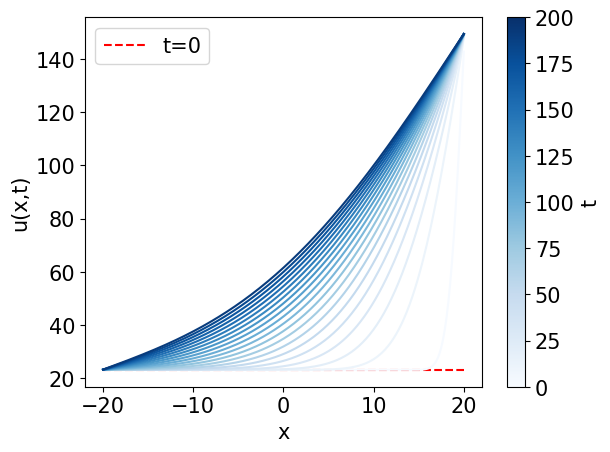

In [15]:
fig, ax = plt.subplots()

#plot initial condition in red
ax.plot(x,ut[0,:],'r--', label='t=0')

#plot the solution
cmap = plt.get_cmap('Blues')

for i in range(1,ut.shape[0],10):
    ax.plot(x,ut[i,:],color=cmap(i/ut.shape[0]))

plt.xlabel('x')
plt.ylabel('u(x,t)')

#colormap
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=tmax))
sm.set_array([])
plt.colorbar(sm, label='t', ax=ax)

ax.legend()
plt.show()